In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/test.csv")
df1=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df2=df.add(df1)

In [ ]:
df2.shape

(1460, 81)

In [ ]:
df.shape

(1459, 80)

In [ ]:
frames = [df, df1]

result = pd.concat(frames)
display(result)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,...,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,...,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,...,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl

In [ ]:
x=result.dropna()
result.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [ ]:
result=result[result['SalePrice']>0]


In [ ]:
result.shape

(1460, 81)

In [ ]:
print(result.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
rs = result.transpose()



In [ ]:
df_A = rs[0:19]
df_B = rs[20:39]
df_C = rs[40:59]
df_D = rs[60:81]


In [ ]:
df_A = df_A.transpose()
df_B = df_B.transpose()
df_C = df_C.transpose()
df_D = df_D.transpose()


In [ ]:
df_A["SalePrice"] = df_D["SalePrice"]
df_B["SalePrice"] = df_D["SalePrice"]
df_C["SalePrice"] = df_D["SalePrice"]

In [ ]:
df_A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,250000


In [ ]:
df_A = df_A.fillna(0)

In [ ]:
corr = df_A.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,SalePrice
Id,1.00,0.01,-0.02,-0.03,-0.03,0.01,-0.02
MSSubClass,0.01,1.00,-0.22,-0.14,0.03,-0.06,-0.08
LotFrontage,-0.02,-0.22,1.00,0.10,0.18,-0.05,0.21
LotArea,-0.03,-0.14,0.10,1.00,0.11,-0.01,0.26
OverallQual,-0.03,0.03,0.18,0.11,1.00,-0.09,0.79
OverallCond,0.01,-0.06,-0.05,-0.01,-0.09,1.00,-0.08
SalePrice,-0.02,-0.08,0.21,0.26,0.79,-0.08,1.00


In [ ]:
df_B = df_B.fillna(0)
corr = df_B.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
YearRemodAdd,1.00,0.18,0.13,-0.07,0.18,0.29,0.51
MasVnrArea,0.18,1.00,0.26,-0.07,0.11,0.36,0.47
BsmtFinSF1,0.13,0.26,1.00,-0.05,-0.50,0.52,0.39
BsmtFinSF2,-0.07,-0.07,-0.05,1.00,-0.21,0.10,-0.01
BsmtUnfSF,0.18,0.11,-0.50,-0.21,1.00,0.42,0.21
TotalBsmtSF,0.29,0.36,0.52,0.10,0.42,1.00,0.61
SalePrice,0.51,0.47,0.39,-0.01,0.21,0.61,1.00


In [ ]:
df_C = df_C.fillna(0)
corr = df_C.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,SalePrice
1stFlrSF,1.00,-0.20,-0.01,0.57,0.24,0.00,0.38,-0.12,0.13,0.07,0.41,0.41,0.61
2ndFlrSF,-0.20,1.00,0.06,0.69,-0.17,-0.02,0.42,0.61,0.50,0.06,0.62,0.19,0.32
LowQualFinSF,-0.01,0.06,1.00,0.13,-0.05,-0.01,-0.00,-0.03,0.11,0.01,0.13,-0.02,-0.03
GrLivArea,0.57,0.69,0.13,1.00,0.03,-0.02,0.63,0.42,0.52,0.10,0.83,0.46,0.71
BsmtFullBath,0.24,-0.17,-0.05,0.03,1.00,-0.15,-0.06,-0.03,-0.15,-0.04,-0.05,0.14,0.23
BsmtHalfBath,0.00,-0.02,-0.01,-0.02,-0.15,1.00,-0.05,-0.01,0.05,-0.04,-0.02,0.03,-0.02
FullBath,0.38,0.42,-0.00,0.63,-0.06,-0.05,1.00,0.14,0.36,0.13,0.55,0.24,0.56
HalfBath,-0.12,0.61,-0.03,0.42,-0.03,-0.01,0.14,1.00,0.23,-0.07,0.34,0.20,0.28
BedroomAbvGr,0.13,0.50,0.11,0.52,-0.15,0.05,0.36,0.23,1.00,0.20,0.68,0.11,0.17
KitchenAbvGr,0.07,0.06,0.01,0.10,-0.04,-0.04,0.13,-0.07,0.20,1.00,0.26,-0.12,-0.14


In [ ]:
df_D = df_D.fillna(0)
corr = df_D.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
GarageCars,1.00,0.88,0.23,0.21,-0.15,0.04,0.05,0.02,-0.04,0.04,-0.04,0.64
GarageArea,0.88,1.00,0.22,0.24,-0.12,0.04,0.05,0.06,-0.03,0.03,-0.03,0.62
WoodDeckSF,0.23,0.22,1.00,0.06,-0.13,-0.03,-0.07,0.07,-0.01,0.02,0.02,0.32
OpenPorchSF,0.21,0.24,0.06,1.00,-0.09,-0.01,0.07,0.06,-0.02,0.07,-0.06,0.32
EnclosedPorch,-0.15,-0.12,-0.13,-0.09,1.00,-0.04,-0.08,0.05,0.02,-0.03,-0.01,-0.13
3SsnPorch,0.04,0.04,-0.03,-0.01,-0.04,1.00,-0.03,-0.01,0.00,0.03,0.02,0.04
ScreenPorch,0.05,0.05,-0.07,0.07,-0.08,-0.03,1.00,0.05,0.03,0.02,0.01,0.11
PoolArea,0.02,0.06,0.07,0.06,0.05,-0.01,0.05,1.00,0.03,-0.03,-0.06,0.09
MiscVal,-0.04,-0.03,-0.01,-0.02,0.02,0.00,0.03,0.03,1.00,-0.01,0.00,-0.02
MoSold,0.04,0.03,0.02,0.07,-0.03,0.03,0.02,-0.03,-0.01,1.00,-0.15,0.05


In [ ]:
selected = result[["YearRemodAdd","YearBuilt","YrSold","MoSold","SalePrice","OverallQual", "GrLivArea" ,"GarageCars", "GarageArea"]]

In [ ]:
selected.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010])

In [ ]:
selected.MoSold.unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [ ]:
selected["Month_Year"] = str(selected['YrSold']) + "-" + str(selected['MoSold'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(len(selected)) : 
 selected["Month_Year"][i] = str(selected['YrSold'][i]) + "-" + str(selected['MoSold'][i])  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
selected.Month_Year.unique()

array(['2008-2', '2007-5', '2008-9', '2006-2', '2008-12', '2009-10',
       '2007-8', '2009-11', '2008-4', '2008-1', '2006-7', '2008-5',
       '2007-7', '2010-3', '2006-10', '2008-6', '2009-5', '2006-11',
       '2007-6', '2010-5', '2009-7', '2006-12', '2008-7', '2010-4',
       '2006-9', '2009-6', '2010-1', '2007-12', '2006-5', '2010-2',
       '2009-8', '2007-1', '2007-2', '2006-8', '2007-3', '2007-10',
       '2009-2', '2010-7', '2010-6', '2009-12', '2006-3', '2008-10',
       '2006-4', '2009-3', '2007-11', '2009-4', '2008-8', '2009-9',
       '2007-4', '2008-3', '2009-1', '2006-6', '2006-1', '2008-11',
       '2007-9'], dtype=object)

In [ ]:
corr = selected.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)



,YearRemodAdd,YearBuilt,YrSold,MoSold,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
YearRemodAdd,1.00,0.59,0.04,0.02,0.51,0.55,0.29,0.42,0.37
YearBuilt,0.59,1.00,-0.01,0.01,0.52,0.57,0.20,0.54,0.48
YrSold,0.04,-0.01,1.00,-0.15,-0.03,-0.03,-0.04,-0.04,-0.03
MoSold,0.02,0.01,-0.15,1.00,0.05,0.07,0.05,0.04,0.03
SalePrice,0.51,0.52,-0.03,0.05,1.00,0.79,0.71,0.64,0.62
OverallQual,0.55,0.57,-0.03,0.07,0.79,1.00,0.59,0.60,0.56
GrLivArea,0.29,0.20,-0.04,0.05,0.71,0.59,1.00,0.47,0.47
GarageCars,0.42,0.54,-0.04,0.04,0.64,0.60,0.47,1.00,0.88
GarageArea,0.37,0.48,-0.03,0.03,0.62,0.56,0.47,0.88,1.00


In [ ]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YrSold        1460 non-null   int64  
 3   MoSold        1460 non-null   int64  
 4   SalePrice     1460 non-null   float64
 5   OverallQual   1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   GarageCars    1460 non-null   float64
 8   GarageArea    1460 non-null   float64
 9   Month_Year    1460 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 165.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
y = selected["SalePrice"]
X = selected.drop(columns=["SalePrice","Month_Year"])
X = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (1168, 8)
X_test shape:  (292, 8)
y_train shape:  (1168,)
y_test shape:  (292,)


In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)


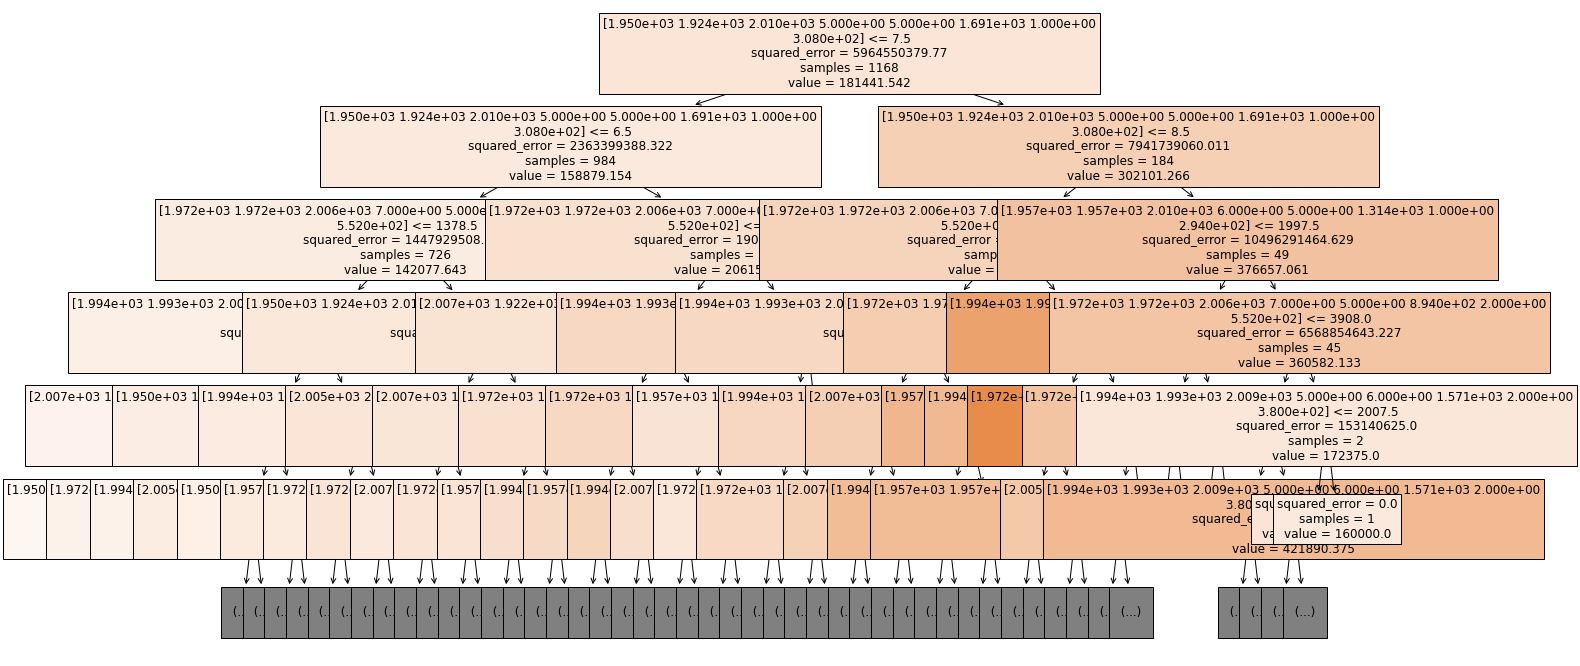

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,12))
_=plot_tree(regressor,max_depth=5,feature_names=list(X_train),filled=True,fontsize=12)

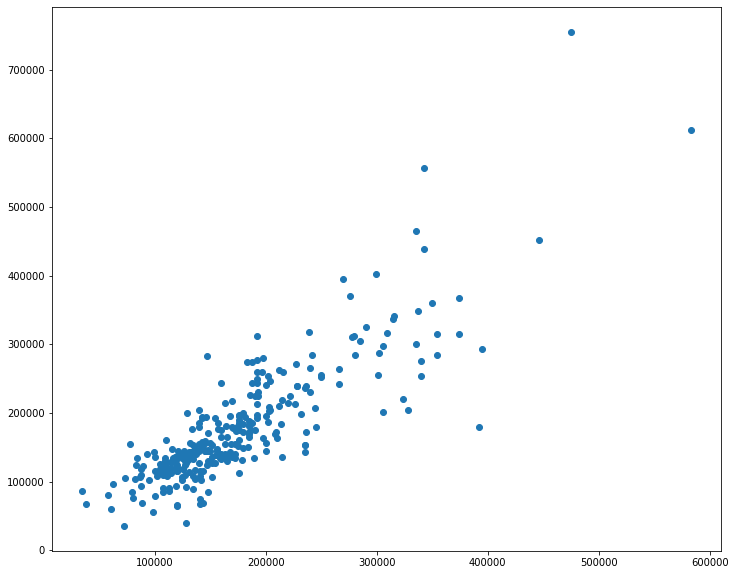

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(y_pred, y_test,)

In [ ]:
res = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})


In [ ]:
def R2(Y, Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

R2(y_test, y_pred)

0.7202791122124466

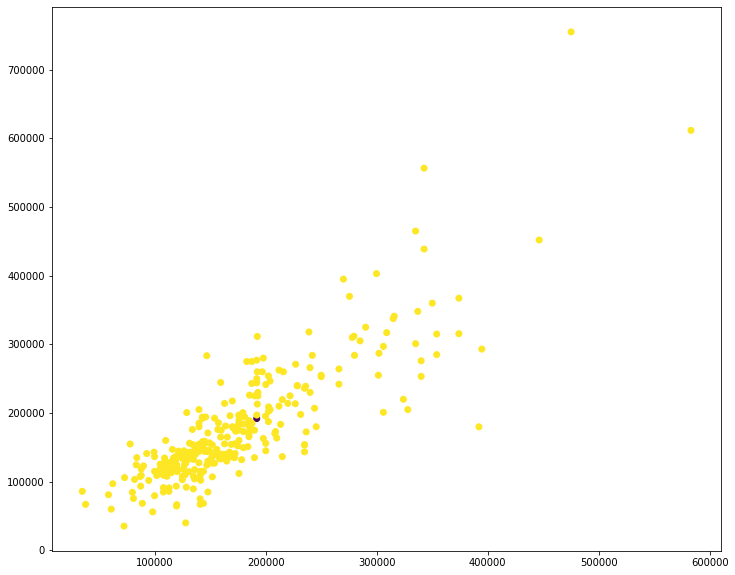

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(y_pred, y_test,c=y_pred!=y_test)

In [ ]:
def OLS(Y, Y_hat):
    N = Y.shape[0]
    return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [ ]:
print(OLS(y_test,y_pred))

1072775228.1472602


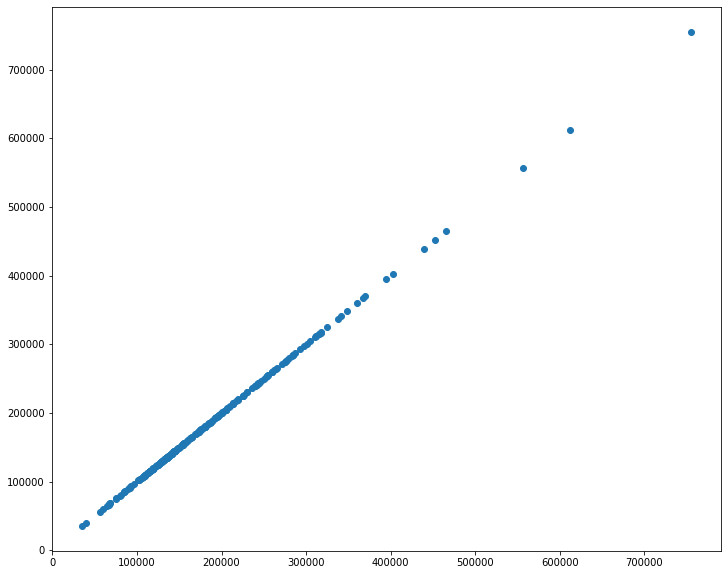

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(y_test, y_test,)

In [ ]:
class OurLinearRegression():
    
    def fit(self, X, y, eta=1e-10, epochs = 1e5, show_curve = False):
        epochs = int(epochs)
        N, D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        J = np.zeros(epochs)
        
        for epoch in range(epochs):
            
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat)
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            
    def predict(self, X):
        return X@self.W

In [ ]:
linR = OurLinearRegression()
linR.fit(X_train,y_train, show_curve=True)
y_hat_train_linR = linR.predict(X_train)

R2(y_train, y_hat_train_linR)


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(y_hat_train_linR, y_train,c=y_hat_train_linR!=y_train)